## 5.1　汎化：機械学習の目標

In [1]:
import copy
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

#### 5.1.1　アンダーフィッティングと過学習

In [2]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

train_images_with_noise_channels = np.concatenate([train_images, np.random.random((len(train_images), 784))], axis=1)
train_images_with_zeros_channels = np.concatenate([train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
def get_model():
  model = keras.Sequential([
      layers.Dense(512, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])

  model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

In [4]:
model = get_model()
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 20s 47ms/step - loss: 0.6208 - accuracy: 0.8098 - val_loss: 0.3098 - val_accuracy: 0.9043
Epoch 2/10
375/375 [==============================] - 8s 23ms/step - loss: 0.2588 - accuracy: 0.9200 - val_loss: 0.2773 - val_accuracy: 0.9097
Epoch 3/10
375/375 [==============================] - 7s 20ms/step - loss: 0.1710 - accuracy: 0.9463 - val_loss: 0.2046 - val_accuracy: 0.9375
Epoch 4/10
375/375 [==============================] - 9s 23ms/step - loss: 0.1205 - accuracy: 0.9627 - val_loss: 0.1335 - val_accuracy: 0.9602
Epoch 5/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0895 - accuracy: 0.9718 - val_loss: 0.1597 - val_accuracy: 0.9548
Epoch 6/10
375/375 [==============================] - 8s 21ms/step - loss: 0.0654 - accuracy: 0.9786 - val_loss: 0.1370 - val_accuracy: 0.9599
Epoch 7/10
375/375 [==============================] - 9s 23ms/step - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.1308 - val_accuracy: 0.964

In [5]:
model = get_model()
history_zeros = model.fit(train_images_with_zeros_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 11s 29ms/step - loss: 0.2937 - accuracy: 0.9149 - val_loss: 0.1505 - val_accuracy: 0.9553
Epoch 2/10
375/375 [==============================] - 8s 22ms/step - loss: 0.1231 - accuracy: 0.9643 - val_loss: 0.1021 - val_accuracy: 0.9709
Epoch 3/10
375/375 [==============================] - 9s 24ms/step - loss: 0.0810 - accuracy: 0.9760 - val_loss: 0.0950 - val_accuracy: 0.9722
Epoch 4/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0581 - accuracy: 0.9826 - val_loss: 0.0852 - val_accuracy: 0.9745
Epoch 5/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0440 - accuracy: 0.9866 - val_loss: 0.0755 - val_accuracy: 0.9775
Epoch 6/10
375/375 [==============================] - 8s 22ms/step - loss: 0.0323 - accuracy: 0.9907 - val_loss: 0.0726 - val_accuracy: 0.9772
Epoch 7/10
375/375 [==============================] - 7s 19ms/step - loss: 0.0248 - accuracy: 0.9934 - val_loss: 0.0761 - val_accuracy: 0.977

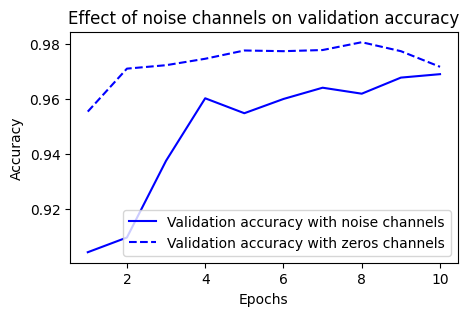

In [6]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1, 11)
plt.figure(figsize=(5, 3))
plt.plot(epochs, val_acc_noise, 'b-', label='Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b--', label='Validation accuracy with zeros channels')
plt.title('Effect of noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#### 5.1.2　ディープラーニングでの汎化の性質

In [7]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

random_train_labels = train_labels
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, random_train_labels, epochs=100, batch_size=128, validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 5s 12ms/step - loss: 2.3152 - accuracy: 0.1063 - val_loss: 2.3059 - val_accuracy: 0.1055
Epoch 2/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2989 - accuracy: 0.1157 - val_loss: 2.3122 - val_accuracy: 0.1002
Epoch 3/100
375/375 [==============================] - 4s 12ms/step - loss: 2.2909 - accuracy: 0.1256 - val_loss: 2.3126 - val_accuracy: 0.1126
Epoch 4/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2795 - accuracy: 0.1377 - val_loss: 2.3227 - val_accuracy: 0.1074
Epoch 5/100
375/375 [==============================] - 5s 12ms/step - loss: 2.2640 - accuracy: 0.1509 - val_loss: 2.3398 - val_accuracy: 0.1008
Epoch 6/100
375/375 [==============================] - 4s 11ms/step - loss: 2.2433 - accuracy: 0.1655 - val_loss: 2.3446 - val_accuracy: 0.1020
Epoch 7/100
375/375 [==============================] - 5s 13ms/step - loss: 2.2204 - accuracy: 0.1813 - val_loss: 2.3589 - val_accuracy: